In [2]:
import torch
from utils import data_utils
from utils import lmdb_dataset
import cv2
from torchvision import datasets
import albumentations
import albumentations as A
import numpy as np
import time
from PIL import Image

/home/richard/miniconda3/envs/dl_env/lib/python3.12/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
#dataset = datasets.ImageFolder(root="/home/richard/HPC-Scratch/sig-ml/clap/datasets/imagenet1k/val_folder",loader = lambda img_path:cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB))
dataset = lmdb_dataset.ImageFolderLMDB(db_path="./datasets/imagenet1k/train/train.lmdb",img_type="Numpy")

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
<class 'numpy.ndarray'>


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

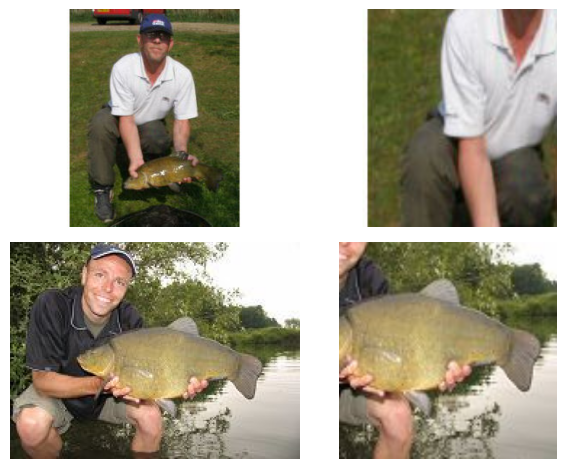

In [5]:
# RandomResizedCrop
transform = data_utils.get_transform(aug_ops=["RandomResizedCrop"],aug_params={"crop_size":224,"crop_min_scale":0.08,"crop_max_scale":1.0},aug_pkg="albumentations")
print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(transform(image = dataset[i][0])["image"])
data_utils.show_images(img_list,2,2)
    

<class 'numpy.ndarray'>


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

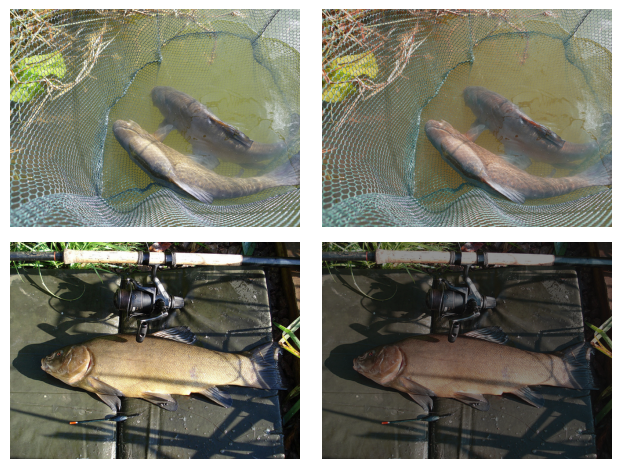

In [5]:
# ColorJittering
transform = data_utils.get_transform(aug_ops=["ColorJitter"],aug_params={"jitter_brightness":0.4,"jitter_contrast":0.4,"jitter_saturation":0.2,"jitter_hue":0.1,"jitter_prob":0.8},aug_pkg="albumentations")
print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(transform(image = dataset[i][0])["image"])
data_utils.show_images(img_list,2,2)

/home/richard/miniconda3/envs/dl_env/lib/python3.12/site-packages/pydantic/main.py:214: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


<class 'numpy.ndarray'>


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

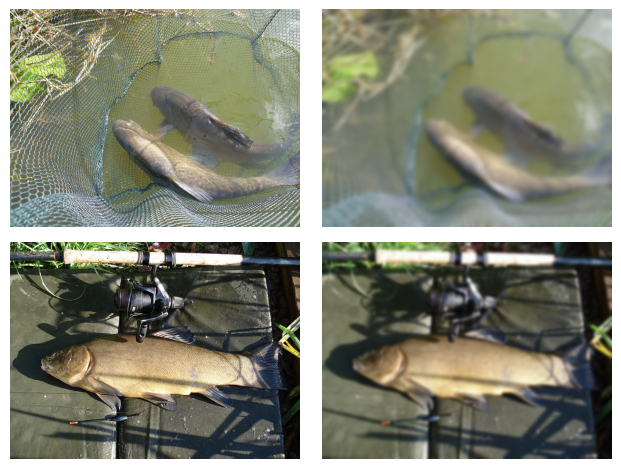

In [7]:
# Gaussian Blur
transform = data_utils.get_transform(aug_ops=["GaussianBlur"],aug_params={"blur_kernel_size":23,"blur_prob":1.0},aug_pkg="albumentations")
print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(transform(image = dataset[i][0])["image"])
data_utils.show_images(img_list,2,2)

In [3]:
# RandomGrayscale
transform = data_utils.get_transform(aug_ops=["RandomGrayscale"],aug_params={"grayscale_prob":0.8},aug_pkg="albumentations")
print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(transform(image = dataset[i][0])["image"])
data_utils.show_images(img_list,2,2)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


NameError: name 'dataset' is not defined

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
<class 'numpy.ndarray'>
Albumentations time: 0.024091720581054688
Torchvision time: 0.12282443046569824


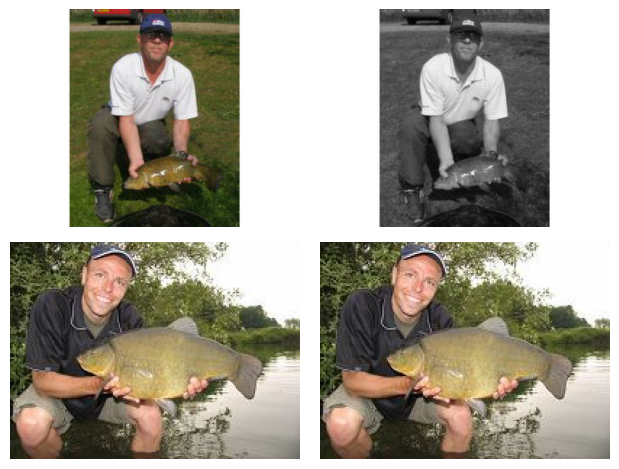

In [6]:
# RandomHorizontalFlip
albumentations_transform = data_utils.get_transform(aug_ops=["RandomGrayscale"],aug_params={"grayscale_prob":0.8},aug_pkg="albumentations")
torchvision_transform = data_utils.get_transform(aug_ops=["RandomGrayscale"],aug_params={"grayscale_prob":0.8},aug_pkg="torchvision")
print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(albumentations_transform(image = dataset[i][0])["image"])
data_utils.show_images(img_list,2,2)


start = time.time()
img = np.array(dataset[0][0])
for _ in range(1000):
    augmented = albumentations_transform(image=img)["image"]
print("Albumentations time:", time.time() - start)


start = time.time()
img = Image.fromarray(dataset[0][0])
for _ in range(1000):
    augmented = torchvision_transform(img)
print("Torchvision time:", time.time() - start)

Files already downloaded and verified
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
<class 'PIL.Image.Image'>
Albumentations time: 0.004756927490234375
Torchvision time: 0.009858369827270508


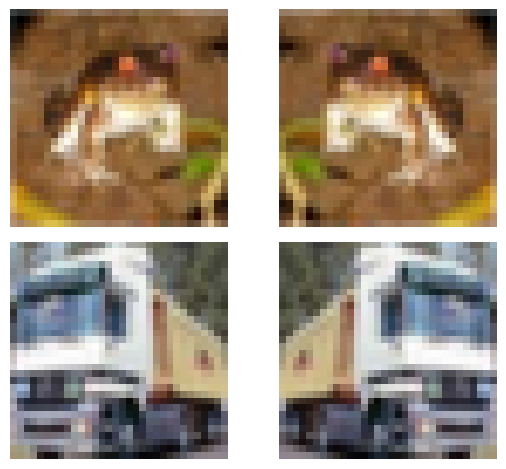

In [10]:

dataset = datasets.CIFAR10(root="./datasets/cifar10", train=True,download=True)
# RandomResizedCrop
#transform = data_utils.get_transform(aug_ops=["ToNumpyArr"],aug_params={},aug_pkg="albumentations")
albumentations_transform = data_utils.get_transform(aug_ops=["RandomHorizontalFlip"],aug_params={"hflip_prob":0.8},aug_pkg="albumentations")
torchvision_transform = data_utils.get_transform(aug_ops=["RandomHorizontalFlip"],aug_params={"hflip_prob":0.8},aug_pkg="torchvision")

print(type(dataset[0][0]))
img_list = []
for i in range(2):
    img_list.append(dataset[i][0])
    img_list.append(albumentations_transform(image = np.array(dataset[i][0]))["image"])
data_utils.show_images(img_list,2,2)

start = time.time()
img = np.array(dataset[i][0])
for _ in range(1000):
    augmented = albumentations_transform(image=img)["image"]
print("Albumentations time:", time.time() - start)


start = time.time()
img = dataset[i][0]
for _ in range(1000):
    augmented = torchvision_transform(img)
print("Torchvision time:", time.time() - start)

In [7]:
batch_size,out_dim,n_views= 10,15,20
preds = torch.rand(n_views,batch_size,out_dim)
corr = torch.matmul(torch.permute(preds,(1,2,0)), torch.permute(preds,(1,0,2)))/n_views # size B*O*O
trace1 = torch.diagonal(corr,dim1=1,dim2=2).sum(dim=1)
print(trace1)

tensor([4.8772, 4.9645, 4.8024, 4.7857, 5.0628, 4.7379, 4.9186, 4.9004, 4.8510,
        5.0781])


In [8]:
trace2 = torch.sum(torch.permute(preds,(1,0,2))**2,dim=(1,2))/n_views 
print(trace2)

tensor([4.8772, 4.9645, 4.8024, 4.7857, 5.0628, 4.7379, 4.9186, 4.9004, 4.8510,
        5.0781])
